In [21]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Expoloratory data analysis

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary

* survied: 0=No, 1=Yes

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Import python lib for visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #seting seaborn default for plots

#### Bar chat for Categorical Features
* Pclass
* Sex
* SibSp (# of siblings and spouse)
* Parch (# of parents and children)
* Embarked
* Cabin

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','Dead']
    df.plot(kind = 'bar',stacked=True,figsize=(10,5))

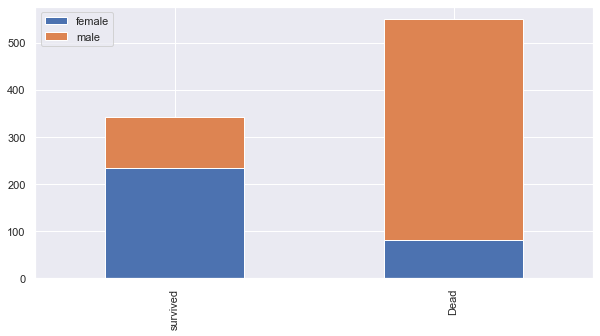

In [14]:
bar_chart('Sex')

The Chart Confirms **Women** more likely survied than **Man**


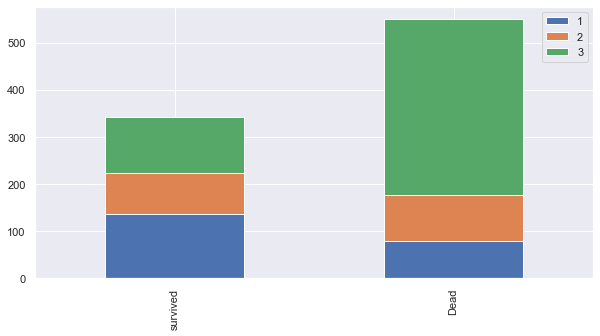

In [15]:
bar_chart('Pclass')

The Chart confirms **1st Class** more likely survived than **other classes**<br>
The Chart confirms **3rd Class** more likely dead than **other classes**

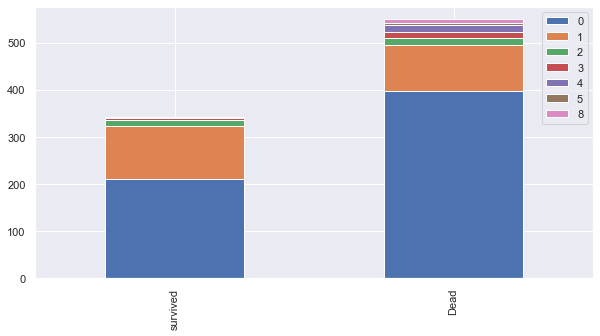

In [16]:
bar_chart('SibSp')

The Chart confirms **a person abroarded with more than 2 siblings or spouse** more likely survived<br>
The Chart confirms **a person abroarded without siblings or spouse** more likely dead

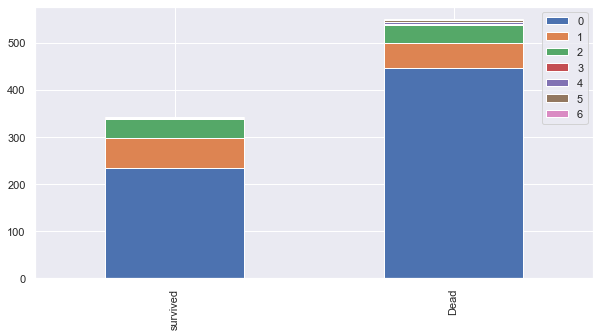

In [17]:
bar_chart('Parch')

The Chart confirms **a person abroarded with more than 2 parents or chlidren** more likely survived<br>
The Chart confirms **a person abroarded alone** more likely dead

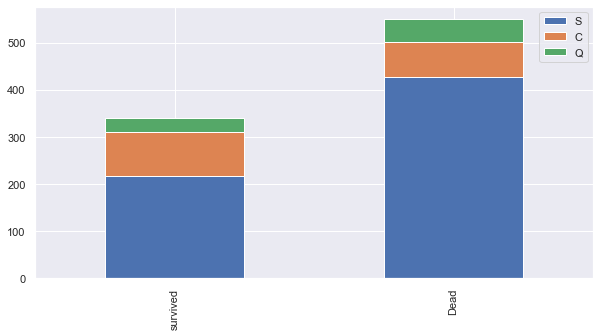

In [18]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived<br>The Chart confirms **a person aboarded from Q** slightly more likely dead<br>The Chart confirms **a person aboarded from S** slightly more likely dead

### Feature engineering

In [40]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


**Name**

In [34]:
train_test_data = [train, test] # combine train and test dataset

for dataset in train_test_data:
   dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [35]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Don           1
Sir           1
Mme           1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Name: Title, dtype: int64

In [36]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [43]:
title_mapping = {
"Mr":            0,
"Miss":          1,
"Mrs":           2,
"Master":        3,
"Dr":            3,
"Rev":            3,
"Major":          3,
"Mlle":          3,
"Col":           3,
"Ms":            3,
"Don":           3,
"Sir":           3,
"Mme":           3,
"Countess":      3,
"Jonkheer":      3,
"Capt":          3,
"Lady":         3}

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


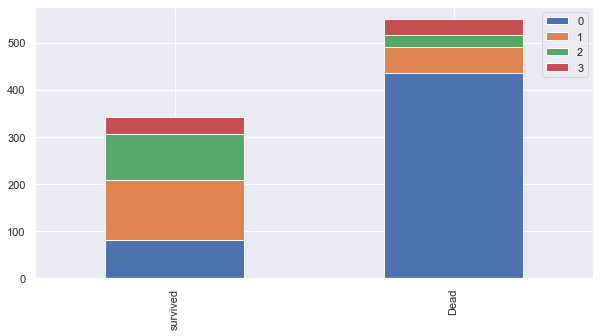

In [46]:
bar_chart('Title')

In [50]:
# delete the unnecessery features from the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


**male = 0 female: 1**

In [58]:
sex_mapping= {"male" : 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

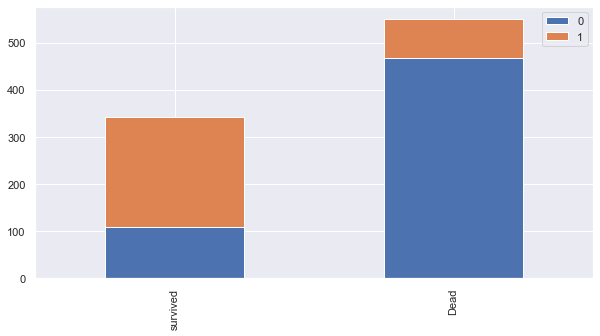

In [59]:
bar_chart('Sex')

**in age some datas are missing-** lets add title median for missing Age

In [67]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,sex
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2,1


In [66]:
test.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,sex
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0,1
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,0,25.0,0,0,350033,7.7958,NaN,S,0.0,0
96,988,1,1,76.0,1,0,19877,78.8500,C46,S,2.0,1
97,989,3,0,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S,0.0,0
98,990,3,1,20.0,0,0,347471,7.8542,NaN,S,1.0,1


In [68]:
# in my mistake there is new colum add call "sex" let's drop it
train.drop(columns = 'sex')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,sex
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [72]:
#fill missing age with median age for each title (Mr,Mrs,Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

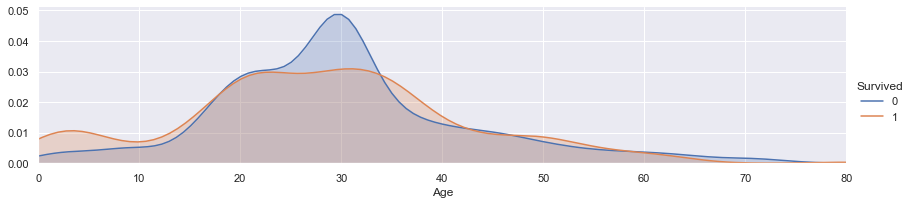

In [74]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age' ,shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

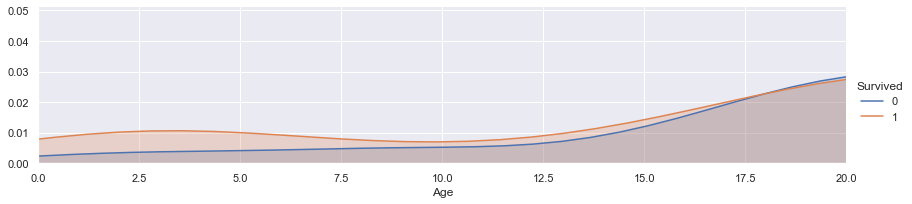

In [76]:
facet = sns.FacetGrid(train, hue="Survived" ,aspect=4)
facet.map(sns.kdeplot,'Age', shade= True)
facet.add_legend()
plt.xlim(0,20)